In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob # for combining csvs

In [113]:
data_files = glob.glob('../data/*.csv')

The data is presented in seperate csv files for each year. I already started the filtering process by only grabbing data from 1990 onwards. I want to look at only "modern" tennis so I will be only using matches from 2000 onwards for my machine learning model. But, I need match history for a feature so I am including matches from 1990 onwards.

In [114]:
df = pd.concat(
  (pd.read_csv(filename) for filename in data_files), 
  ignore_index=True
)

df
df_raw = df

## Preprocessing and Feature Engineering

For this section I'll look to process and filter the data, and also to add some features to the dataset. Then I'll look to perform some EDA on the processed data.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110397 entries, 0 to 110396
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          110397 non-null  object 
 1   tourney_name        110397 non-null  object 
 2   surface             110344 non-null  object 
 3   draw_size           110397 non-null  int64  
 4   tourney_level       110397 non-null  object 
 5   tourney_date        110397 non-null  int64  
 6   match_num           110397 non-null  int64  
 7   winner_id           110397 non-null  int64  
 8   winner_seed         44673 non-null   object 
 9   winner_entry        13526 non-null   object 
 10  winner_name         110397 non-null  object 
 11  winner_hand         110390 non-null  object 
 12  winner_ht           107561 non-null  float64
 13  winner_ioc          110397 non-null  object 
 14  winner_age          110386 non-null  float64
 15  loser_id            110397 non-nul

Firstly, let's convert the `tourney_date` column to date type.

In [116]:
df['tourney_date'] = pd.to_datetime(df.tourney_date, format = '%Y%m%d')

In [117]:
df = df.sort_values(by=['tourney_date', 'tourney_name', 'match_num'])
df.head(30)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
46243,1990-339,Adelaide,Hard,32,A,1990-01-01,1,101843,1.0,NaN,Sergi Bruguera,R,188.0,ESP,18.9,101632,NaN,Q,Per Henricsson,R,190.0,SWE,20.3,7-6 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,591.0,282.0,70.0
46244,1990-339,Adelaide,Hard,32,A,1990-01-01,2,100714,NaN,WC,Broderick Dyke,L,183.0,AUS,29.0,101096,NaN,NaN,Gary Muller,L,190.0,RSA,25.0,6-4 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,157.0,127.0,182.0
46245,1990-339,Adelaide,Hard,32,A,1990-01-01,3,101529,NaN,NaN,Michael Stich,R,193.0,GER,21.2,101232,NaN,NaN,Nicklas Kroon,R,183.0,SWE,23.9,6-4 6-3,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,215.0,71.0,290.0
46246,1990-339,Adelaide,Hard,32,A,1990-01-01,4,100628,7.0,NaN,Michiel Schapers,R,201.0,NED,30.2,101434,NaN,NaN,Petr Korda,L,190.0,CZE,21.9,6-3 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,297.0,80.0,271.0
46247,1990-339,Adelaide,Hard,32,A,1990-01-01,5,101404,3.0,NaN,Thomas Muster,L,180.0,AUT,22.2,101387,NaN,NaN,Claudio Pistolesi,R,180.0,ITA,22.3,6-4 4-6 6-3,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,496.0,100.0,224.0
46248,1990-339,Adelaide,Hard,32,A,1990-01-01,6,100713,NaN,NaN,John Fitzgerald,R,183.0,AUS,29.0,101552,NaN,Q,Xavier Daufresne,R,193.0,BEL,21.0,3-6 7-5 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,217.0,336.0,54.0
46249,1990-339,Adelaide,Hard,32,A,1990-01-01,7,101256,NaN,WC,Mark Kratzmann,L,178.0,AUS,23.6,101727,NaN,NaN,Jason Stoltenberg,R,185.0,AUS,19.7,5-7 4-3 RET,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,211.0,91.0,245.0
46250,1990-339,Adelaide,Hard,32,A,1990-01-01,8,100901,5.0,NaN,Paul Annacone,R,185.0,USA,26.7,101344,NaN,NaN,Bruno Oresar,R,175.0,CRO,22.6,6-1 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,361.0,90.0,247.0
46251,1990-339,Adelaide,Hard,32,A,1990-01-01,9,101440,6.0,NaN,Mark Koevermans,R,185.0,NED,21.9,101123,NaN,Q,Alexander Mronz,R,188.0,GER,24.7,6-1 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,306.0,164.0,135.0
46252,1990-339,Adelaide,Hard,32,A,1990-01-01,10,101234,NaN,NaN,Patrik Kuhnen,R,190.0,GER,23.8,101235,NaN,NaN,Paul Haarhuis,R,188.0,NED,23.8,6-3 2-6 7-6,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,236.0,76.0,280.0


There are many columns that are dtype "object". I will have to turn those columns into numeric, or drop them. I am also seeing a lot of null values. Let's look into these columns. If I want to keep them, then I will drop the null values if there aren't that many.

In [118]:
df.shape

(110397, 49)

In [119]:
df.drop_duplicates(inplace=True)

In [120]:
df.shape # no duplicates

(110397, 49)

In [121]:
# checking for nulls
df.isna().sum(axis=0).sort_values(ascending=False)

winner_entry          96871
loser_entry           88188
loser_seed            85794
winner_seed           65724
minutes               16719
l_1stIn               13955
l_svpt                13955
l_ace                 13955
l_df                  13955
w_1stWon              13955
w_ace                 13955
w_df                  13955
w_svpt                13955
w_2ndWon              13955
w_1stIn               13955
l_1stWon              13955
l_2ndWon              13955
l_bpFaced             13955
l_bpSaved             13955
w_bpFaced             13955
w_bpSaved             13955
w_SvGms               13954
l_SvGms               13954
loser_ht               5397
loser_rank_points      3884
winner_ht              2836
loser_rank             2717
winner_rank_points     2462
winner_rank            1287
surface                  53
loser_hand               42
loser_age                33
winner_age               11
winner_hand               7
winner_ioc                0
loser_id            

In [122]:
missing_stats = df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]
missing_stats

winner_entry          0.877479
loser_entry           0.798826
loser_seed            0.777141
winner_seed           0.595342
minutes               0.151444
l_1stIn               0.126407
l_svpt                0.126407
l_ace                 0.126407
l_df                  0.126407
w_1stWon              0.126407
w_ace                 0.126407
w_df                  0.126407
w_svpt                0.126407
w_2ndWon              0.126407
w_1stIn               0.126407
l_1stWon              0.126407
l_2ndWon              0.126407
l_bpFaced             0.126407
l_bpSaved             0.126407
w_bpFaced             0.126407
w_bpSaved             0.126407
w_SvGms               0.126398
l_SvGms               0.126398
loser_ht              0.048887
loser_rank_points     0.035182
winner_ht             0.025689
loser_rank            0.024611
winner_rank_points    0.022301
winner_rank           0.011658
surface               0.000480
loser_hand            0.000380
loser_age             0.000299
winner_a

Winner entry and loser entry are expected to be high. Those columns are there to indicate if a player has come from the qualifications for the tournament or is a wildcard.  This is generally not the case. For now I don't think that those columns are needed, so I am going to go ahead and drop them. I am also going to drop `winner_seed` and `loser_seed` because both those columns are redundant since we have the ranking of the winner and loser too.

In [123]:
df.drop(columns=['winner_entry', 'loser_entry', 'loser_seed', 'winner_seed'], inplace=True)

In [124]:
missing_stats = df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]
missing_stats

minutes               0.151444
l_1stIn               0.126407
l_svpt                0.126407
l_1stWon              0.126407
l_df                  0.126407
l_bpFaced             0.126407
w_1stWon              0.126407
w_df                  0.126407
w_ace                 0.126407
w_2ndWon              0.126407
w_1stIn               0.126407
w_svpt                0.126407
l_2ndWon              0.126407
l_bpSaved             0.126407
l_ace                 0.126407
w_bpFaced             0.126407
w_bpSaved             0.126407
l_SvGms               0.126398
w_SvGms               0.126398
loser_ht              0.048887
loser_rank_points     0.035182
winner_ht             0.025689
loser_rank            0.024611
winner_rank_points    0.022301
winner_rank           0.011658
surface               0.000480
loser_hand            0.000380
loser_age             0.000299
winner_age            0.000100
winner_hand           0.000063
winner_ioc            0.000000
winner_id             0.000000
winner_n

The next group of numbers are all stats about the match that was played.  These numbers are not helpful to be worked with because they're happening after the match has already started. For now I am going to drop these numbers, but I may return to them if I want to look at previous match stats as predictors.

In [125]:
df.drop(columns=['minutes','w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','l_bpSaved','l_bpFaced'], inplace=True)

In [126]:
missing_stats = df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]
missing_stats

loser_ht              0.048887
loser_rank_points     0.035182
winner_ht             0.025689
loser_rank            0.024611
winner_rank_points    0.022301
winner_rank           0.011658
surface               0.000480
loser_hand            0.000380
loser_age             0.000299
winner_age            0.000100
winner_hand           0.000063
winner_id             0.000000
match_num             0.000000
tourney_date          0.000000
draw_size             0.000000
tourney_level         0.000000
tourney_id            0.000000
tourney_name          0.000000
winner_name           0.000000
loser_name            0.000000
winner_ioc            0.000000
loser_id              0.000000
loser_ioc             0.000000
round                 0.000000
score                 0.000000
best_of               0.000000
dtype: float64

For the height columns I'm going to just filter out the null values because they're a small subset of the data.

In [127]:
df.dropna(subset=['loser_ht', 'winner_ht'], inplace=True)

In [128]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

loser_rank_points     0.016947
winner_rank_points    0.013979
loser_rank            0.005899
winner_rank           0.002815
surface               0.000029
loser_hand            0.000019
winner_hand           0.000010
tourney_name          0.000000
tourney_level         0.000000
tourney_id            0.000000
winner_name           0.000000
winner_id             0.000000
match_num             0.000000
tourney_date          0.000000
draw_size             0.000000
winner_ht             0.000000
winner_age            0.000000
winner_ioc            0.000000
loser_ioc             0.000000
loser_ht              0.000000
loser_name            0.000000
loser_id              0.000000
round                 0.000000
best_of               0.000000
score                 0.000000
loser_age             0.000000
dtype: float64

For the next 4 rows I want to completely drop the columns `_rank_points` columns, and just filter the nulls out of the `_rank` columns.

In [129]:
df.drop(columns=['loser_rank_points', 'winner_rank_points'], inplace=True)

In [130]:
df.dropna(subset=['loser_rank', 'winner_rank'], inplace=True)

In [131]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

surface          0.000029
tourney_id       0.000000
tourney_name     0.000000
draw_size        0.000000
tourney_level    0.000000
tourney_date     0.000000
match_num        0.000000
winner_id        0.000000
winner_name      0.000000
winner_hand      0.000000
winner_ht        0.000000
winner_ioc       0.000000
winner_age       0.000000
loser_id         0.000000
loser_name       0.000000
loser_hand       0.000000
loser_ht         0.000000
loser_ioc        0.000000
loser_age        0.000000
score            0.000000
best_of          0.000000
round            0.000000
winner_rank      0.000000
loser_rank       0.000000
dtype: float64

### Feature Engineering 

Now I'm going to try and engineer two features into my dataset. I am choosing to do this now because I want to drop columns later on that I will need for producing this feature. Once that's finished then I will look to continue with preprocessing.

Many of the null values have been removed, so I am in a good place to add features. 

I want to engineer a feature that gives me the surface win percentage for both the winner and loser of each match. For my overall analysis I am going to only look at Masters 1000 tournaments and Grand Slams, but for this feature I would like to include all lower level ATP tour matches. This is  simply because some surfaces such as grass don't have enough higher level tournaments, and so I would not be able to build an accurate win percentage if I don't include those tournaments.  I am also going to include columns that show the number of matches played by each player prior to the match.  I'm building that feature because I'd like to filter matches to only those where both players have played at least 3 matches.

In [132]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank
46243,1990-339,Adelaide,Hard,32,A,1990-01-01,1,101843,Sergi Bruguera,R,188.0,ESP,18.9,101632,Per Henricsson,R,190.0,SWE,20.3,7-6 6-2,3,R32,25.0,282.0
46244,1990-339,Adelaide,Hard,32,A,1990-01-01,2,100714,Broderick Dyke,L,183.0,AUS,29.0,101096,Gary Muller,L,190.0,RSA,25.0,6-4 6-4,3,R32,146.0,127.0
46245,1990-339,Adelaide,Hard,32,A,1990-01-01,3,101529,Michael Stich,R,193.0,GER,21.2,101232,Nicklas Kroon,R,183.0,SWE,23.9,6-4 6-3,3,R32,113.0,71.0
46246,1990-339,Adelaide,Hard,32,A,1990-01-01,4,100628,Michiel Schapers,R,201.0,NED,30.2,101434,Petr Korda,L,190.0,CZE,21.9,6-3 6-4,3,R32,68.0,80.0
46247,1990-339,Adelaide,Hard,32,A,1990-01-01,5,101404,Thomas Muster,L,180.0,AUT,22.2,101387,Claudio Pistolesi,R,180.0,ITA,22.3,6-4 4-6 6-3,3,R32,34.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,2024-7694,Lyon,Clay,32,A,2024-05-20,290,126239,Arthur Rinderknech,R,196.0,FRA,28.8,126207,Frances Tiafoe,R,188.0,USA,26.3,7-6(7) 6-4,3,R16,73.0,26.0
4089,2024-7694,Lyon,Clay,32,A,2024-05-20,292,144869,Tomas Martin Etcheverry,R,196.0,ARG,24.8,205734,Thiago Seyboth Wild,R,185.0,BRA,24.1,7-5 3-0 RET,3,R16,29.0,58.0
4088,2024-7694,Lyon,Clay,32,A,2024-05-20,293,136440,Dominik Koepfer,L,180.0,GER,30.0,200005,Ugo Humbert,L,188.0,FRA,25.9,2-6 6-4 6-4,3,R16,67.0,17.0
4087,2024-7694,Lyon,Clay,32,A,2024-05-20,294,122330,Alexander Bublik,R,196.0,KAZ,26.9,200303,Pavel Kotov,R,191.0,RUS,25.5,6-7(4) 7-6(4) 6-3,3,QF,19.0,57.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103185 entries, 46243 to 4084
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tourney_id     103185 non-null  object        
 1   tourney_name   103185 non-null  object        
 2   surface        103182 non-null  object        
 3   draw_size      103185 non-null  int64         
 4   tourney_level  103185 non-null  object        
 5   tourney_date   103185 non-null  datetime64[ns]
 6   match_num      103185 non-null  int64         
 7   winner_id      103185 non-null  int64         
 8   winner_name    103185 non-null  object        
 9   winner_hand    103185 non-null  object        
 10  winner_ht      103185 non-null  float64       
 11  winner_ioc     103185 non-null  object        
 12  winner_age     103185 non-null  float64       
 13  loser_id       103185 non-null  int64         
 14  loser_name     103185 non-null  object        
 15  los

First let's include all the tournaments that I mentioned above. I will further filter this dataset down later in the notebook.

In [134]:
tourney_fltr = ((df['tourney_level'] == 'M') | (df['tourney_level'] == 'G') | (df['tourney_level'] == 'A'))

df = df.loc[tourney_fltr, :]

In [135]:
df['tourney_level'].unique()

array(['A', 'G', 'M'], dtype=object)

In [136]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

tourney_id       0.0
tourney_name     0.0
surface          0.0
draw_size        0.0
tourney_level    0.0
tourney_date     0.0
match_num        0.0
winner_id        0.0
winner_name      0.0
winner_hand      0.0
winner_ht        0.0
winner_ioc       0.0
winner_age       0.0
loser_id         0.0
loser_name       0.0
loser_hand       0.0
loser_ht         0.0
loser_ioc        0.0
loser_age        0.0
score            0.0
best_of          0.0
round            0.0
winner_rank      0.0
loser_rank       0.0
dtype: float64

So getting rid of the lower level tournaments got rid of the null values in `surface`. Let's look at the surfaces I have now.

In [137]:
df['surface'].value_counts()

surface
Hard      48802
Clay      32373
Grass      9946
Carpet     6413
Name: count, dtype: int64

Now I am going to create an algorithm that will get me 4 additional columns in my dataframe.  The first two will be the total number of matches that the winner and loser played prior to that match. The second two columns will show the win percentage on that surface for both players prior to the match.  I make these changes in the subsequent cells.

Algorithm

1. Sort the data so that its chronological
2. Store the nessecary data in an object that gets continually updated as I loop through the data.

 Examples:
 
 cumulative_surface_record = {'Player Name': {'Hard': array(0, 0)}} 

 num_matches on surface = {'Player Name': {'Hard': 0}}

Let's build the algorithm with a chunk of the data and then go from there.

First sort the data so that its chronological

In [138]:
df = df.sort_values(by=['tourney_date', 'tourney_name', 'match_num'])
df.head(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank
46243,1990-339,Adelaide,Hard,32,A,1990-01-01,1,101843,Sergi Bruguera,R,188.0,ESP,18.9,101632,Per Henricsson,R,190.0,SWE,20.3,7-6 6-2,3,R32,25.0,282.0
46244,1990-339,Adelaide,Hard,32,A,1990-01-01,2,100714,Broderick Dyke,L,183.0,AUS,29.0,101096,Gary Muller,L,190.0,RSA,25.0,6-4 6-4,3,R32,146.0,127.0
46245,1990-339,Adelaide,Hard,32,A,1990-01-01,3,101529,Michael Stich,R,193.0,GER,21.2,101232,Nicklas Kroon,R,183.0,SWE,23.9,6-4 6-3,3,R32,113.0,71.0
46246,1990-339,Adelaide,Hard,32,A,1990-01-01,4,100628,Michiel Schapers,R,201.0,NED,30.2,101434,Petr Korda,L,190.0,CZE,21.9,6-3 6-4,3,R32,68.0,80.0
46247,1990-339,Adelaide,Hard,32,A,1990-01-01,5,101404,Thomas Muster,L,180.0,AUT,22.2,101387,Claudio Pistolesi,R,180.0,ITA,22.3,6-4 4-6 6-3,3,R32,34.0,100.0
46248,1990-339,Adelaide,Hard,32,A,1990-01-01,6,100713,John Fitzgerald,R,183.0,AUS,29.0,101552,Xavier Daufresne,R,193.0,BEL,21.0,3-6 7-5 6-2,3,R32,107.0,336.0
46249,1990-339,Adelaide,Hard,32,A,1990-01-01,7,101256,Mark Kratzmann,L,178.0,AUS,23.6,101727,Jason Stoltenberg,R,185.0,AUS,19.7,5-7 4-3 RET,3,R32,115.0,91.0
46250,1990-339,Adelaide,Hard,32,A,1990-01-01,8,100901,Paul Annacone,R,185.0,USA,26.7,101344,Bruno Oresar,R,175.0,CRO,22.6,6-1 6-4,3,R32,51.0,90.0
46251,1990-339,Adelaide,Hard,32,A,1990-01-01,9,101440,Mark Koevermans,R,185.0,NED,21.9,101123,Alexander Mronz,R,188.0,GER,24.7,6-1 6-4,3,R32,63.0,164.0
46252,1990-339,Adelaide,Hard,32,A,1990-01-01,10,101234,Patrik Kuhnen,R,190.0,GER,23.8,101235,Paul Haarhuis,R,188.0,NED,23.8,6-3 2-6 7-6,3,R32,96.0,76.0


iterate over rows and for each row save the data in a cumulative manner. Create a new column for `loser_surface_num_matches` and `winner_surface_num_matches`. Also create `winner_surface_win_pct` and `loser_surface_win_pct` columns.

In [139]:
# sample of the data first
df_sample = df.head(1000).copy()

In [140]:
# create new columns
df_sample['winner_surface_win_pct'] = None
df_sample['loser_surface_win_pct'] = None
df_sample['winner_surface_num_matches'] = None
df_sample['loser_surface_num_matches'] = None
df_sample

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,winner_surface_win_pct,loser_surface_win_pct,winner_surface_num_matches,loser_surface_num_matches
46243,1990-339,Adelaide,Hard,32,A,1990-01-01,1,101843,Sergi Bruguera,R,188.0,ESP,18.9,101632,Per Henricsson,R,190.0,SWE,20.3,7-6 6-2,3,R32,25.0,282.0,None,None,None,None
46244,1990-339,Adelaide,Hard,32,A,1990-01-01,2,100714,Broderick Dyke,L,183.0,AUS,29.0,101096,Gary Muller,L,190.0,RSA,25.0,6-4 6-4,3,R32,146.0,127.0,None,None,None,None
46245,1990-339,Adelaide,Hard,32,A,1990-01-01,3,101529,Michael Stich,R,193.0,GER,21.2,101232,Nicklas Kroon,R,183.0,SWE,23.9,6-4 6-3,3,R32,113.0,71.0,None,None,None,None
46246,1990-339,Adelaide,Hard,32,A,1990-01-01,4,100628,Michiel Schapers,R,201.0,NED,30.2,101434,Petr Korda,L,190.0,CZE,21.9,6-3 6-4,3,R32,68.0,80.0,None,None,None,None
46247,1990-339,Adelaide,Hard,32,A,1990-01-01,5,101404,Thomas Muster,L,180.0,AUT,22.2,101387,Claudio Pistolesi,R,180.0,ITA,22.3,6-4 4-6 6-3,3,R32,34.0,100.0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47427,1990-434,Seoul,Hard,32,A,1990-04-16,1,100923,Wally Masur,R,180.0,AUS,26.9,101500,Christian Saceanu,R,190.0,GER,21.7,6-2 6-2,3,R32,27.0,134.0,None,None,None,None
47428,1990-434,Seoul,Hard,32,A,1990-04-16,2,101066,Richard Matuszewski,R,188.0,USA,25.6,101727,Jason Stoltenberg,R,185.0,AUS,20.0,6-2 6-7 6-2,3,R32,170.0,139.0,None,None,None,None
47429,1990-434,Seoul,Hard,32,A,1990-04-16,3,100896,Miguel Nido,R,180.0,PUR,27.1,100946,Slobodan Zivojinovic,R,198.0,YUG,26.7,6-0 1-0 RET,3,R32,128.0,110.0,None,None,None,None
47430,1990-434,Seoul,Hard,32,A,1990-04-16,4,101332,Gilad Bloom,L,173.0,ISR,23.1,101154,Simon Youl,R,185.0,AUS,24.7,6-3 6-1,3,R32,106.0,115.0,None,None,None,None


In [141]:
def safe_divide(a, b):
    if b == 0:
        return 0
    else:
        return a / b

In [142]:
# get all player names 
winner_names = df_sample['winner_name'].unique()
loser_names = df_sample['loser_name'].unique()

In [143]:

# remove duplicates
combine_names = np.hstack((winner_names, loser_names))
unique_names = set(combine_names)


# initialize the objects for building my featured columns
cumu_surface_num_matches = {}
cumu_sum_by_player = {}
for name in unique_names:
    cumu_surface_num_matches[name] = {'Hard': 0,
                                      'Clay': 0,
                                      'Grass': 0,
                                      'Carpet': 0}
    
    cumu_sum_by_player[name] = {'Hard': [0, 0],
                                  'Clay': [0, 0],
                                  'Grass': [0, 0],
                                  'Carpet': [0, 0]}

In [144]:
for index, row in df_sample.iterrows():
    winner_name = row['winner_name']
    loser_name = row['loser_name']
    surface = row['surface']

    # first get win_pct_on surface
    winner_total_wins = cumu_sum_by_player[winner_name][surface][0]
    winner_total_matches = sum(cumu_sum_by_player[winner_name][surface])
    winner_win_pct = safe_divide(winner_total_wins, winner_total_matches)

    # now get loser's win pct on surface
    loser_total_wins = cumu_sum_by_player[loser_name][surface][0]
    loser_total_matches = sum(cumu_sum_by_player[loser_name][surface])
    loser_win_pct = safe_divide(loser_total_wins, loser_total_matches)

    # now add both to respective columns in df
    df_sample.loc[index, 'winner_surface_win_pct'] = winner_win_pct
    df_sample.loc[index, 'loser_surface_win_pct'] = loser_win_pct

    # update winner's record
    cumu_sum_by_player[winner_name][surface][0] += 1

    # update loser's record
    cumu_sum_by_player[loser_name][surface][1] += 1

    
    # add number matches to respective columns
    df_sample.loc[index, 'winner_surface_num_matches'] = cumu_surface_num_matches[winner_name][surface]
    df_sample.loc[index, 'loser_surface_num_matches'] = cumu_surface_num_matches[loser_name][surface]

    # update winner and loser num matches
    cumu_surface_num_matches[winner_name][surface]+=1
    cumu_surface_num_matches[loser_name][surface]+=1

Here I am just checking my code with Brad Gilbert who's a player I'm familiar with.

In [145]:
print(cumu_surface_num_matches['Brad Gilbert'])

{'Hard': 13, 'Clay': 0, 'Grass': 0, 'Carpet': 12}


In [146]:
print(cumu_sum_by_player['Brad Gilbert'])

{'Hard': [10, 3], 'Clay': [0, 0], 'Grass': [0, 0], 'Carpet': [9, 3]}


In [147]:
df_sample[df['winner_name'] == 'Brad Gilbert']

/var/folders/yy/_hh479r54nd7sj2r16_q79j40000gn/T/ipykernel_38278/890109149.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sample[df['winner_name'] == 'Brad Gilbert']


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,winner_surface_win_pct,loser_surface_win_pct,winner_surface_num_matches,loser_surface_num_matches
46752,1990-302,Toronto Indoor,Carpet,56,A,1990-02-12,40,100763,Brad Gilbert,R,185.0,USA,28.5,101233,Alex Antonitsch,R,188.0,AUT,24.0,6-3 6-3,3,R32,5.0,88.0,0.0,1.0,1,1
46760,1990-302,Toronto Indoor,Carpet,56,A,1990-02-12,48,100763,Brad Gilbert,R,185.0,USA,28.5,100990,Milan Srejber,R,203.0,CZE,26.1,6-2 6-2,3,R16,5.0,59.0,0.5,0.8,2,5
46764,1990-302,Toronto Indoor,Carpet,56,A,1990-02-12,52,100763,Brad Gilbert,R,185.0,USA,28.5,101434,Petr Korda,L,190.0,CZE,22.0,3-6 7-6 6-2,3,QF,5.0,76.0,0.666667,0.75,3,4
46799,1990-401,Philadelphia,Carpet,48,A,1990-02-19,32,100763,Brad Gilbert,R,185.0,USA,28.5,100631,Tim Wilkison,L,180.0,USA,30.2,6-2 7-5,3,R32,5.0,101.0,0.6,0.5,5,4
46893,1990-407,Rotterdam,Carpet,32,A,1990-02-26,1,100763,Brad Gilbert,R,185.0,USA,28.5,101772,Andrei Cherkasov,R,180.0,RUS,19.6,7-5 4-6 6-4,3,R32,4.0,68.0,0.571429,0.0,7,2
46909,1990-407,Rotterdam,Carpet,32,A,1990-02-26,17,100763,Brad Gilbert,R,185.0,USA,28.5,101481,Omar Camporese,R,188.0,ITA,21.8,6-3 6-3,3,R16,4.0,90.0,0.625,0.25,8,4
46917,1990-407,Rotterdam,Carpet,32,A,1990-02-26,25,100763,Brad Gilbert,R,185.0,USA,28.5,101195,Amos Mansdorf,R,175.0,ISR,24.3,6-1 7-6,3,QF,4.0,43.0,0.666667,0.666667,9,6
46921,1990-407,Rotterdam,Carpet,32,A,1990-02-26,29,100763,Brad Gilbert,R,185.0,USA,28.5,101264,Michael Tauson,R,193.0,DEN,23.6,6-3 6-3,3,SF,4.0,144.0,0.7,1.0,10,3
46923,1990-407,Rotterdam,Carpet,32,A,1990-02-26,31,100763,Brad Gilbert,R,185.0,USA,28.5,101298,Jonas Svensson,R,188.0,SWE,23.3,6-1 6-3,3,F,4.0,29.0,0.727273,0.818182,11,11
46983,1990-404,Indian Wells Masters,Hard,56,M,1990-03-05,29,100763,Brad Gilbert,R,185.0,USA,28.5,101232,Nicklas Kroon,R,183.0,SWE,24.0,6-4 6-2,3,R32,4.0,80.0,0,0.428571,0,7


In [148]:
df_sample[df['loser_name'] == 'Brad Gilbert']

/var/folders/yy/_hh479r54nd7sj2r16_q79j40000gn/T/ipykernel_38278/3917664121.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sample[df['loser_name'] == 'Brad Gilbert']


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,winner_surface_win_pct,loser_surface_win_pct,winner_surface_num_matches,loser_surface_num_matches
46651,1990-424,San Francisco,Carpet,32,A,1990-02-05,1,101096,Gary Muller,L,190.0,RSA,25.1,100763,Brad Gilbert,R,185.0,USA,28.4,6-4 7-6,3,R32,128.0,4.0,0,0,0,0
46766,1990-302,Toronto Indoor,Carpet,56,A,1990-02-12,54,100689,Tim Mayotte,R,190.0,USA,29.5,100763,Brad Gilbert,R,185.0,USA,28.5,6-3 7-6,3,SF,12.0,5.0,0.875,0.75,8,4
46807,1990-401,Philadelphia,Carpet,48,A,1990-02-19,40,101235,Paul Haarhuis,R,188.0,NED,24.0,100763,Brad Gilbert,R,185.0,USA,28.5,7-6 5-7 6-4,3,R16,69.0,5.0,0.666667,0.666667,6,6
46997,1990-404,Indian Wells Masters,Hard,56,M,1990-03-05,43,101142,Emilio Sanchez,R,180.0,ESP,24.7,100763,Brad Gilbert,R,185.0,USA,28.5,6-3 6-3,3,R16,19.0,4.0,0.875,1.0,8,1
47085,1990-403,Miami Masters,Hard,96,M,1990-03-16,76,101439,Javier Sanchez,R,178.0,ESP,22.1,100763,Brad Gilbert,R,185.0,USA,28.5,6-3 6-7 7-6,3,R32,44.0,4.0,0.5,0.666667,8,3
47394,1990-329,Tokyo Outdoor,Hard,56,A,1990-04-09,54,101222,Stefan Edberg,R,188.0,SWE,24.2,100763,Brad Gilbert,R,185.0,USA,28.6,6-1 7-6,3,SF,2.0,5.0,0.863636,0.833333,22,12


This code looks great, and the algorithm seems to be working. Now let's use it on the full dataset.

In [149]:
# first add all additional columns
df['winner_surface_win_pct'] = None
df['loser_surface_win_pct'] = None
df['winner_surface_num_matches'] = None
df['loser_surface_num_matches'] = None
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,winner_surface_win_pct,loser_surface_win_pct,winner_surface_num_matches,loser_surface_num_matches
46243,1990-339,Adelaide,Hard,32,A,1990-01-01,1,101843,Sergi Bruguera,R,188.0,ESP,18.9,101632,Per Henricsson,R,190.0,SWE,20.3,7-6 6-2,3,R32,25.0,282.0,None,None,None,None
46244,1990-339,Adelaide,Hard,32,A,1990-01-01,2,100714,Broderick Dyke,L,183.0,AUS,29.0,101096,Gary Muller,L,190.0,RSA,25.0,6-4 6-4,3,R32,146.0,127.0,None,None,None,None
46245,1990-339,Adelaide,Hard,32,A,1990-01-01,3,101529,Michael Stich,R,193.0,GER,21.2,101232,Nicklas Kroon,R,183.0,SWE,23.9,6-4 6-3,3,R32,113.0,71.0,None,None,None,None
46246,1990-339,Adelaide,Hard,32,A,1990-01-01,4,100628,Michiel Schapers,R,201.0,NED,30.2,101434,Petr Korda,L,190.0,CZE,21.9,6-3 6-4,3,R32,68.0,80.0,None,None,None,None
46247,1990-339,Adelaide,Hard,32,A,1990-01-01,5,101404,Thomas Muster,L,180.0,AUT,22.2,101387,Claudio Pistolesi,R,180.0,ITA,22.3,6-4 4-6 6-3,3,R32,34.0,100.0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,2024-7694,Lyon,Clay,32,A,2024-05-20,290,126239,Arthur Rinderknech,R,196.0,FRA,28.8,126207,Frances Tiafoe,R,188.0,USA,26.3,7-6(7) 6-4,3,R16,73.0,26.0,None,None,None,None
4089,2024-7694,Lyon,Clay,32,A,2024-05-20,292,144869,Tomas Martin Etcheverry,R,196.0,ARG,24.8,205734,Thiago Seyboth Wild,R,185.0,BRA,24.1,7-5 3-0 RET,3,R16,29.0,58.0,None,None,None,None
4088,2024-7694,Lyon,Clay,32,A,2024-05-20,293,136440,Dominik Koepfer,L,180.0,GER,30.0,200005,Ugo Humbert,L,188.0,FRA,25.9,2-6 6-4 6-4,3,R16,67.0,17.0,None,None,None,None
4087,2024-7694,Lyon,Clay,32,A,2024-05-20,294,122330,Alexander Bublik,R,196.0,KAZ,26.9,200303,Pavel Kotov,R,191.0,RUS,25.5,6-7(4) 7-6(4) 6-3,3,QF,19.0,57.0,None,None,None,None


In [150]:
# get all player names 
winner_names = df['winner_name'].unique()
loser_names = df['loser_name'].unique()

In [151]:
# remove duplicates
combine_names = np.hstack((winner_names, loser_names))
unique_names = set(combine_names)


# initialize the objects for building my featured columns
cumu_surface_num_matches = {}
cumu_sum_by_player = {}
for name in unique_names:
    cumu_surface_num_matches[name] = {'Hard': 0,
                                      'Clay': 0,
                                      'Grass': 0,
                                      'Carpet': 0}
    
    cumu_sum_by_player[name] = {'Hard': [0, 0],
                                  'Clay': [0, 0],
                                  'Grass': [0, 0],
                                  'Carpet': [0, 0]}

In [152]:
for index, row in df.iterrows():
    winner_name = row['winner_name']
    loser_name = row['loser_name']
    surface = row['surface']

    # first get win_pct_on surface
    winner_total_wins = cumu_sum_by_player[winner_name][surface][0]
    winner_total_matches = sum(cumu_sum_by_player[winner_name][surface])
    winner_win_pct = safe_divide(winner_total_wins, winner_total_matches)

    # now get loser's win pct on surface
    loser_total_wins = cumu_sum_by_player[loser_name][surface][0]
    loser_total_matches = sum(cumu_sum_by_player[loser_name][surface])
    loser_win_pct = safe_divide(loser_total_wins, loser_total_matches)

    # now add both to respective columns in df
    df.loc[index, 'winner_surface_win_pct'] = winner_win_pct
    df.loc[index, 'loser_surface_win_pct'] = loser_win_pct

    # update winner's record
    cumu_sum_by_player[winner_name][surface][0] += 1

    # update loser's record
    cumu_sum_by_player[loser_name][surface][1] += 1

    
    # add number matches to respective columns
    df.loc[index, 'winner_surface_num_matches'] = cumu_surface_num_matches[winner_name][surface]
    df.loc[index, 'loser_surface_num_matches'] = cumu_surface_num_matches[loser_name][surface]

    # update winner and loser num matches
    cumu_surface_num_matches[winner_name][surface]+=1
    cumu_surface_num_matches[loser_name][surface]+=1

In [153]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,winner_surface_win_pct,loser_surface_win_pct,winner_surface_num_matches,loser_surface_num_matches
46243,1990-339,Adelaide,Hard,32,A,1990-01-01,1,101843,Sergi Bruguera,R,188.0,ESP,18.9,101632,Per Henricsson,R,190.0,SWE,20.3,7-6 6-2,3,R32,25.0,282.0,0,0,0,0
46244,1990-339,Adelaide,Hard,32,A,1990-01-01,2,100714,Broderick Dyke,L,183.0,AUS,29.0,101096,Gary Muller,L,190.0,RSA,25.0,6-4 6-4,3,R32,146.0,127.0,0,0,0,0
46245,1990-339,Adelaide,Hard,32,A,1990-01-01,3,101529,Michael Stich,R,193.0,GER,21.2,101232,Nicklas Kroon,R,183.0,SWE,23.9,6-4 6-3,3,R32,113.0,71.0,0,0,0,0
46246,1990-339,Adelaide,Hard,32,A,1990-01-01,4,100628,Michiel Schapers,R,201.0,NED,30.2,101434,Petr Korda,L,190.0,CZE,21.9,6-3 6-4,3,R32,68.0,80.0,0,0,0,0
46247,1990-339,Adelaide,Hard,32,A,1990-01-01,5,101404,Thomas Muster,L,180.0,AUT,22.2,101387,Claudio Pistolesi,R,180.0,ITA,22.3,6-4 4-6 6-3,3,R32,34.0,100.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,2024-7694,Lyon,Clay,32,A,2024-05-20,290,126239,Arthur Rinderknech,R,196.0,FRA,28.8,126207,Frances Tiafoe,R,188.0,USA,26.3,7-6(7) 6-4,3,R16,73.0,26.0,0.470588,0.476923,34,65
4089,2024-7694,Lyon,Clay,32,A,2024-05-20,292,144869,Tomas Martin Etcheverry,R,196.0,ARG,24.8,205734,Thiago Seyboth Wild,R,185.0,BRA,24.1,7-5 3-0 RET,3,R16,29.0,58.0,0.526316,0.487179,57,39
4088,2024-7694,Lyon,Clay,32,A,2024-05-20,293,136440,Dominik Koepfer,L,180.0,GER,30.0,200005,Ugo Humbert,L,188.0,FRA,25.9,2-6 6-4 6-4,3,R16,67.0,17.0,0.46875,0.333333,32,39
4087,2024-7694,Lyon,Clay,32,A,2024-05-20,294,122330,Alexander Bublik,R,196.0,KAZ,26.9,200303,Pavel Kotov,R,191.0,RUS,25.5,6-7(4) 7-6(4) 6-3,3,QF,19.0,57.0,0.357143,0.55,42,20


In [154]:
print(cumu_sum_by_player['Andreas Seppi'])

{'Hard': [182, 218], 'Clay': [121, 125], 'Grass': [61, 49], 'Carpet': [4, 10]}


Now that we have the correct columns with the data we want, I'd like to also create a column that gives me the 4 month win percentage for the player. This column will essentially tell me how the player is "trending". 

First, let's take a sample of the data and work with that. I think I'd only need a year of data, so let's grab 2016's year of match data.

In [157]:
date_fltr = (df['tourney_date'] > '2016-01-01') & (df['tourney_date'] < '2016-12-31')
sample_df = df.loc[date_fltr, :].copy()
pd.set_option('display.max_columns', None)
sample_df.sort_values(by=['tourney_date', 'tourney_id', 'match_num'], inplace=True)

In [158]:
sample_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,winner_rank,loser_rank,winner_surface_win_pct,loser_surface_win_pct,winner_surface_num_matches,loser_surface_num_matches
88852,2016-0451,Doha,Hard,32,A,2016-01-04,270,104745,Rafael Nadal,L,185.0,ESP,29.5,105807,Pablo Carreno Busta,R,188.0,ESP,24.4,6-7(5) 6-3 6-1,3,R32,5.0,67.0,0.783296,0.342857,443,35
88853,2016-0451,Doha,Hard,32,A,2016-01-04,271,104898,Robin Haase,R,190.0,NED,28.7,106234,Aslan Karatsev,R,185.0,RUS,22.3,5-7 6-1 7-5,3,R32,66.0,195.0,0.392593,0.2,135,5
88854,2016-0451,Doha,Hard,32,A,2016-01-04,272,105723,Andrey Kuznetsov,R,185.0,RUS,24.8,104947,Marsel Ilhan,R,190.0,TUR,28.5,6-2 6-4,3,R32,79.0,114.0,0.322581,0.289474,31,38
88855,2016-0451,Doha,Hard,32,A,2016-01-04,273,105575,Ricardas Berankis,R,175.0,LTU,25.5,104312,Andreas Seppi,R,190.0,ITA,31.8,3-6 6-1 6-4,3,R32,85.0,29.0,0.512195,0.445652,82,276
88856,2016-0451,Doha,Hard,32,A,2016-01-04,274,105011,Illya Marchenko,R,185.0,UKR,28.3,103970,David Ferrer,R,175.0,ESP,33.7,6-7(8) 6-3 6-2,3,R32,94.0,7.0,0.421053,0.665158,57,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91715,2016-0352,Paris Masters,Hard,64,M,2016-10-31,296,104545,John Isner,R,206.0,USA,31.5,106058,Jack Sock,R,185.0,USA,24.1,7-6(6) 4-6 6-4,3,QF,27.0,24.0,0.645892,0.57037,353,135
91716,2016-0352,Paris Masters,Hard,64,M,2016-10-31,297,105227,Marin Cilic,R,198.0,CRO,28.0,104925,Novak Djokovic,R,188.0,SRB,29.4,6-4 7-6(2),3,QF,10.0,1.0,0.675362,0.853933,345,534
91717,2016-0352,Paris Masters,Hard,64,M,2016-10-31,298,104918,Andy Murray,R,190.0,GBR,29.4,105683,Milos Raonic,R,196.0,CAN,25.8,W/O,3,SF,2.0,5.0,0.793587,0.703704,499,243
91718,2016-0352,Paris Masters,Hard,64,M,2016-10-31,299,104545,John Isner,R,206.0,USA,31.5,105227,Marin Cilic,R,198.0,CRO,28.0,6-4 6-3,3,SF,27.0,10.0,0.646893,0.676301,354,346


In [159]:
! pip install pandasql

In [161]:
sample_df.to_csv('../sample_df.csv', index=False)

In [160]:
import pandasql as psql

In [ ]:
query = """
SELECT 
    t1.date,
    t1.player_name,
    t1.won_match,
    COUNT(t2.won_match) AS wins_last_4_months
FROM 
    sample_df t1
LEFT JOIN 
    df t2 
    ON t1.player_name = t2.player_name
    AND t2.date BETWEEN t1.date - INTERVAL 4 MONTH AND t1.date
    AND t2.won_match = True
GROUP BY 
    t1.date,
    t1.player_name,
    t1.won_match
ORDER BY 
    t1.player_name, t1.date;
"""

# Execute the query
result_df = psql.sqldf(query, locals())

# View the result
print(result_df)


### Preprocessing continued

Now that we've gotten all the features we want, let's go ahead and drop columns that we don't need and that are not numerical. First however, I need to filter out all matches that occured before 2000, and also all matches where the total number of matches played is under 3 for either player.

In [45]:
date_fltr = df['tourney_date'] > '2000-01-01'	

df = df.loc[date_fltr, :]

In [46]:
num_matches_fltr = (df['winner_surface_num_matches'] >= 3) & (df['loser_surface_num_matches'] >= 3)

df = df.loc[num_matches_fltr, :]

In [47]:
(df['winner_surface_num_matches'] < 3).sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58691 entries, 104709 to 4084
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tourney_id                  58691 non-null  object        
 1   tourney_name                58691 non-null  object        
 2   surface                     58691 non-null  object        
 3   draw_size                   58691 non-null  int64         
 4   tourney_level               58691 non-null  object        
 5   tourney_date                58691 non-null  datetime64[ns]
 6   match_num                   58691 non-null  int64         
 7   winner_id                   58691 non-null  int64         
 8   winner_name                 58691 non-null  object        
 9   winner_hand                 58691 non-null  object        
 10  winner_ht                   58691 non-null  float64       
 11  winner_ioc                  58691 non-null  object     

Now we can go ahead and drop some of these columns that we don't need anymore.

In [49]:
df.drop(columns=['round', 'surface', 'tourney_id', 'tourney_name', 'draw_size', 'tourney_date', 'match_num'], inplace=True)

In [50]:
df.isna().sum(axis=0).sort_values(ascending=False)/df.shape[0]

tourney_level                 0.0
winner_id                     0.0
winner_name                   0.0
winner_hand                   0.0
winner_ht                     0.0
winner_ioc                    0.0
winner_age                    0.0
loser_id                      0.0
loser_name                    0.0
loser_hand                    0.0
loser_ht                      0.0
loser_ioc                     0.0
loser_age                     0.0
score                         0.0
best_of                       0.0
winner_rank                   0.0
loser_rank                    0.0
winner_surface_win_pct        0.0
loser_surface_win_pct         0.0
winner_surface_num_matches    0.0
loser_surface_num_matches     0.0
dtype: float64

Now that I don't have any nulls in my dataset, and I've removed many of the columns that aren't needed, I'm going to filter down the data. The biggest change that I want to make is to only include high level professional tennis tournaments.  These tournaments are called Grand Slams, and Masters 1000s. Thankfully, these tournaments are easy to filter for in the dataset. If need I can add other tournaments in at another time. 

So I've used lower tournaments for creating win percentages, but not I am excluding them.

In [51]:
df['tourney_level'].value_counts()

tourney_level
A    34729
M    13249
G    10713
Name: count, dtype: int64

In [52]:
tourney_fltr = ((df['tourney_level'] == 'M') | (df['tourney_level'] == 'G'))

df_filtered = df.loc[tourney_fltr, :].copy()

In [53]:
df_filtered['tourney_level'].value_counts()

tourney_level
M    13249
G    10713
Name: count, dtype: int64

In [54]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23962 entries, 106691 to 3959
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tourney_level               23962 non-null  object 
 1   winner_id                   23962 non-null  int64  
 2   winner_name                 23962 non-null  object 
 3   winner_hand                 23962 non-null  object 
 4   winner_ht                   23962 non-null  float64
 5   winner_ioc                  23962 non-null  object 
 6   winner_age                  23962 non-null  float64
 7   loser_id                    23962 non-null  int64  
 8   loser_name                  23962 non-null  object 
 9   loser_hand                  23962 non-null  object 
 10  loser_ht                    23962 non-null  float64
 11  loser_ioc                   23962 non-null  object 
 12  loser_age                   23962 non-null  float64
 13  score                       2396

Now I have to do one more level of filtering to drop all rows where either player has played less than 3 matches. I also have to convert the new columns I've added to numeric type.

In [55]:
df_filtered['winner_surface_win_pct'] = pd.to_numeric(df['winner_surface_win_pct'])
df_filtered['loser_surface_win_pct'] = pd.to_numeric(df['loser_surface_win_pct'])
df_filtered['winner_surface_num_matches'] = pd.to_numeric(df['winner_surface_num_matches'])
df_filtered['loser_surface_num_matches'] = pd.to_numeric(df['loser_surface_num_matches'])

In [56]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23962 entries, 106691 to 3959
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tourney_level               23962 non-null  object 
 1   winner_id                   23962 non-null  int64  
 2   winner_name                 23962 non-null  object 
 3   winner_hand                 23962 non-null  object 
 4   winner_ht                   23962 non-null  float64
 5   winner_ioc                  23962 non-null  object 
 6   winner_age                  23962 non-null  float64
 7   loser_id                    23962 non-null  int64  
 8   loser_name                  23962 non-null  object 
 9   loser_hand                  23962 non-null  object 
 10  loser_ht                    23962 non-null  float64
 11  loser_ioc                   23962 non-null  object 
 12  loser_age                   23962 non-null  float64
 13  score                       2396

In [57]:
df_filtered.sample(10)

,tourney_level,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,winner_rank,loser_rank,winner_surface_win_pct,loser_surface_win_pct,winner_surface_num_matches,loser_surface_num_matches
95345,M,102271,Hicham Arazi,L,175.0,MAR,30.0,101962,Younes El Aynaoui,R,193.0,MAR,32.1,4-6 6-3 1-2 RET,3,64.0,15.0,0.510638,0.375000,47,24
65728,G,102610,Albert Costa,R,180.0,ESP,28.9,103294,Christophe Rochus,R,170.0,BEL,25.4,6-1 6-2 7-5,5,29.0,112.0,0.683060,0.444444,366,81
5525,M,104731,Kevin Anderson,R,203.0,RSA,31.9,105583,Dusan Lajovic,R,180.0,SRB,27.8,7-6(3) 3-6 6-3,3,8.0,95.0,0.531915,0.478723,94,94
69498,G,104269,Fernando Verdasco,L,188.0,ESP,21.1,104180,Gilles Muller,L,193.0,LUX,21.6,6-3 6-0 6-4,5,36.0,70.0,0.406250,0.473684,32,19
83641,M,103900,David Nalbandian,R,180.0,ARG,24.3,103252,Alberto Martin,R,175.0,ESP,27.7,7-5 6-4,3,3.0,77.0,0.669725,0.542510,109,247
13273,G,104926,Fabio Fognini,R,178.0,ITA,32.6,111442,Jordan Thompson,R,183.0,AUS,25.7,7-6(4) 6-1 3-6 4-6 7-6(4),5,12.0,66.0,0.473881,0.393939,268,66
20110,G,104745,Rafael Nadal,L,185.0,ESP,22.6,103819,Roger Federer,R,185.0,SUI,27.4,7-5 3-6 7-6(3) 3-6 6-2,5,1.0,2.0,0.761421,0.819277,197,415
5012,M,105223,Juan Martin del Potro,R,198.0,ARG,29.4,103970,David Ferrer,R,175.0,ESP,35.9,6-4 7-6(3),3,8.0,33.0,0.724868,0.650099,378,503
75654,G,104229,Yen Hsun Lu,R,180.0,TPE,23.4,103752,Simon Greul,R,185.0,GER,25.7,6-3 6-4 6-3,5,91.0,80.0,0.050000,0.384615,20,13
103263,G,103598,Xavier Malisse,R,185.0,BEL,21.1,102202,Kenneth Carlsen,L,190.0,DEN,28.3,6-1 4-6 3-6 2-1 RET,5,43.0,262.0,0.543478,0.505618,46,178


Now that I've used the `tourney_level` column to filter the dataset I can go ahead and drop it. More than that I can actually go ahead and drop all non-numeric columns.

In [58]:
df_filtered = df_filtered.select_dtypes('number')

In [59]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23962 entries, 106691 to 3959
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   winner_id                   23962 non-null  int64  
 1   winner_ht                   23962 non-null  float64
 2   winner_age                  23962 non-null  float64
 3   loser_id                    23962 non-null  int64  
 4   loser_ht                    23962 non-null  float64
 5   loser_age                   23962 non-null  float64
 6   best_of                     23962 non-null  int64  
 7   winner_rank                 23962 non-null  float64
 8   loser_rank                  23962 non-null  float64
 9   winner_surface_win_pct      23962 non-null  float64
 10  loser_surface_win_pct       23962 non-null  float64
 11  winner_surface_num_matches  23962 non-null  int64  
 12  loser_surface_num_matches   23962 non-null  int64  
dtypes: float64(8), int64(5)
memory u

Lastly I want to drop the `_id` columns because they are identifiers.

In [60]:
df_filtered.drop(columns=['winner_id', 'loser_id'], inplace=True)

In [61]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23962 entries, 106691 to 3959
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   winner_ht                   23962 non-null  float64
 1   winner_age                  23962 non-null  float64
 2   loser_ht                    23962 non-null  float64
 3   loser_age                   23962 non-null  float64
 4   best_of                     23962 non-null  int64  
 5   winner_rank                 23962 non-null  float64
 6   loser_rank                  23962 non-null  float64
 7   winner_surface_win_pct      23962 non-null  float64
 8   loser_surface_win_pct       23962 non-null  float64
 9   winner_surface_num_matches  23962 non-null  int64  
 10  loser_surface_num_matches   23962 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 2.2 MB


In [62]:
df_filtered

,winner_ht,winner_age,loser_ht,loser_age,best_of,winner_rank,loser_rank,winner_surface_win_pct,loser_surface_win_pct,winner_surface_num_matches,loser_surface_num_matches
106691,180.0,29.7,180.0,21.3,5,1.0,112.0,0.800546,0.315789,366,19
106692,193.0,23.3,173.0,23.2,5,47.0,77.0,0.490741,0.200000,108,25
106693,183.0,21.8,180.0,25.3,5,33.0,27.0,0.333333,0.516129,24,62
106694,178.0,28.7,183.0,29.7,5,204.0,93.0,0.534413,0.528889,247,225
106695,180.0,23.7,180.0,31.1,5,46.0,65.0,0.469388,0.484252,49,254
...,...,...,...,...,...,...,...,...,...,...,...
3963,198.0,27.0,193.0,26.5,3,5.0,13.0,0.718232,0.571429,181,77
3962,188.0,26.9,193.0,27.5,3,32.0,56.0,0.583333,0.565217,36,23
3961,198.0,28.5,185.0,26.9,3,24.0,16.0,0.600000,0.454545,100,44
3960,198.0,27.0,188.0,26.9,3,5.0,32.0,0.719780,0.594595,182,37


This is my final dataset for now. I will look to create one more called `ranking_difference` after manipulating the data to have a target column.

In [63]:
suffix_to_append = ['_rank', '_ht', '_age', '_surface_win_pct', '_surface_num_matches']
final_df = pd.DataFrame(columns=list("HR" + ele for ele in suffix_to_append) + 
                            list("LR" + ele for ele in suffix_to_append)  + ['best_of'] + ["HR_win"],
                      index=df_filtered.index)

In [64]:
final_df

,HR_rank,HR_ht,HR_age,HR_surface_win_pct,HR_surface_num_matches,LR_rank,LR_ht,LR_age,LR_surface_win_pct,LR_surface_num_matches,best_of,HR_win
106691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
for index,row in df_filtered.iterrows():
    if row["winner_rank"] < row["loser_rank"]:

        final_df.loc[index,list("HR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("winner" + ele for ele in suffix_to_append)])
        final_df.loc[index,list("LR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("loser" + ele for ele in suffix_to_append)])
        final_df.loc[index,"HR_win"] = 1
        final_df.loc[index,"best_of"] = row['best_of']
    else:

        final_df.loc[index,list("LR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("winner" + ele for ele in suffix_to_append)])
        final_df.loc[index,list("HR" + ele for ele in suffix_to_append)] = list(df.loc[index,list("loser" + ele for ele in suffix_to_append)])
        final_df.loc[index,"HR_win"] = 0
        final_df.loc[index,"best_of"] = row['best_of']

In [66]:
final_df

,HR_rank,HR_ht,HR_age,HR_surface_win_pct,HR_surface_num_matches,LR_rank,LR_ht,LR_age,LR_surface_win_pct,LR_surface_num_matches,best_of,HR_win
106691,1.0,180.0,29.7,0.800546,366,112.0,180.0,21.3,0.315789,19,5.0,1
106692,47.0,193.0,23.3,0.490741,108,77.0,173.0,23.2,0.2,25,5.0,1
106693,27.0,180.0,25.3,0.516129,62,33.0,183.0,21.8,0.333333,24,5.0,0
106694,93.0,183.0,29.7,0.528889,225,204.0,178.0,28.7,0.534413,247,5.0,0
106695,46.0,180.0,23.7,0.469388,49,65.0,180.0,31.1,0.484252,254,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3963,5.0,198.0,27.0,0.718232,181,13.0,193.0,26.5,0.571429,77,3.0,1
3962,32.0,188.0,26.9,0.583333,36,56.0,193.0,27.5,0.565217,23,3.0,1
3961,16.0,185.0,26.9,0.454545,44,24.0,198.0,28.5,0.6,100,3.0,0
3960,5.0,198.0,27.0,0.71978,182,32.0,188.0,26.9,0.594595,37,3.0,1


In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23962 entries, 106691 to 3959
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   HR_rank                 23962 non-null  object
 1   HR_ht                   23962 non-null  object
 2   HR_age                  23962 non-null  object
 3   HR_surface_win_pct      23962 non-null  object
 4   HR_surface_num_matches  23962 non-null  object
 5   LR_rank                 23962 non-null  object
 6   LR_ht                   23962 non-null  object
 7   LR_age                  23962 non-null  object
 8   LR_surface_win_pct      23962 non-null  object
 9   LR_surface_num_matches  23962 non-null  object
 10  best_of                 23962 non-null  object
 11  HR_win                  23962 non-null  object
dtypes: object(12)
memory usage: 2.9+ MB


In [68]:
df_obj_cols = final_df.select_dtypes(include='object').columns

final_df[df_obj_cols] = final_df[df_obj_cols].apply(pd.to_numeric, errors='coerce')

In [69]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23962 entries, 106691 to 3959
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HR_rank                 23962 non-null  float64
 1   HR_ht                   23962 non-null  float64
 2   HR_age                  23962 non-null  float64
 3   HR_surface_win_pct      23962 non-null  float64
 4   HR_surface_num_matches  23962 non-null  int64  
 5   LR_rank                 23962 non-null  float64
 6   LR_ht                   23962 non-null  float64
 7   LR_age                  23962 non-null  float64
 8   LR_surface_win_pct      23962 non-null  float64
 9   LR_surface_num_matches  23962 non-null  int64  
 10  best_of                 23962 non-null  float64
 11  HR_win                  23962 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 2.9 MB


During the process of changing the organization of the dataset, numeric values were changed to "object" dtype.  So the above code is just changing them back.

In [70]:
final_df['ranking_difference'] = final_df['LR_rank'] - final_df['HR_rank']

That is the end of the preprocessing for now. All in all the data looks in good shape for a logistic regression. I will perform one, but first I need to do a little EDA.

### EDA

First I want to look at the class imbalance for my target variable `HR_win`. This will also show how good a random guess for the higher ranked player will be. This will be the number that I am looking to improve upon in my models.

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
final_df['HR_win'].sum() / final_df.shape[0]

0.6734412820298806

Ok so a simple model of just picking the higher ranked player would work about 67% of the time.  The other EDA I want to do on this dataset is to look at the distribution of my features. To do that I'm going to copy my dataset and take the difference between the HR column and LR column. I will then look at my features to see which ones show promise for determining the target variable.

In [73]:
eda_df = final_df.copy()
eda_df.head(10)

,HR_rank,HR_ht,HR_age,HR_surface_win_pct,HR_surface_num_matches,LR_rank,LR_ht,LR_age,LR_surface_win_pct,LR_surface_num_matches,best_of,HR_win,ranking_difference
106691,1.0,180.0,29.7,0.800546,366,112.0,180.0,21.3,0.315789,19,5.0,1,111.0
106692,47.0,193.0,23.3,0.490741,108,77.0,173.0,23.2,0.200000,25,5.0,1,30.0
106693,27.0,180.0,25.3,0.516129,62,33.0,183.0,21.8,0.333333,24,5.0,0,6.0
106694,93.0,183.0,29.7,0.528889,225,204.0,178.0,28.7,0.534413,247,5.0,0,111.0
106695,46.0,180.0,23.7,0.469388,49,65.0,180.0,31.1,0.484252,254,5.0,1,19.0
106696,37.0,190.0,24.8,0.523256,86,75.0,178.0,21.7,0.200000,5,5.0,1,38.0
106699,10.0,196.0,28.1,0.697095,241,25.0,178.0,27.1,0.544503,191,5.0,1,15.0
106700,34.0,185.0,23.7,0.547170,53,36.0,185.0,29.4,0.737952,332,5.0,1,2.0
106702,63.0,188.0,27.8,0.392157,51,99.0,180.0,18.9,0.545455,11,5.0,0,36.0
106703,84.0,173.0,23.5,0.000000,5,123.0,193.0,22.8,0.272727,11,5.0,0,39.0


In [74]:
# take the differences
eda_df['height_diff'] = eda_df['HR_ht'] - eda_df['LR_ht']
eda_df['age_diff'] = eda_df['HR_age'] - eda_df['LR_age']
eda_df['win_pct_diff'] = eda_df['HR_surface_win_pct'] - eda_df['LR_surface_win_pct']
eda_df['num_matches_diff'] = final_df['HR_surface_num_matches'] - final_df['LR_surface_num_matches']

In [75]:
eda_df

,HR_rank,HR_ht,HR_age,HR_surface_win_pct,HR_surface_num_matches,LR_rank,LR_ht,LR_age,LR_surface_win_pct,LR_surface_num_matches,best_of,HR_win,ranking_difference,height_diff,age_diff,win_pct_diff,num_matches_diff
106691,1.0,180.0,29.7,0.800546,366,112.0,180.0,21.3,0.315789,19,5.0,1,111.0,0.0,8.4,0.484757,347
106692,47.0,193.0,23.3,0.490741,108,77.0,173.0,23.2,0.200000,25,5.0,1,30.0,20.0,0.1,0.290741,83
106693,27.0,180.0,25.3,0.516129,62,33.0,183.0,21.8,0.333333,24,5.0,0,6.0,-3.0,3.5,0.182796,38
106694,93.0,183.0,29.7,0.528889,225,204.0,178.0,28.7,0.534413,247,5.0,0,111.0,5.0,1.0,-0.005524,-22
106695,46.0,180.0,23.7,0.469388,49,65.0,180.0,31.1,0.484252,254,5.0,1,19.0,0.0,-7.4,-0.014864,-205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,5.0,198.0,27.0,0.718232,181,13.0,193.0,26.5,0.571429,77,3.0,1,8.0,5.0,0.5,0.146803,104
3962,32.0,188.0,26.9,0.583333,36,56.0,193.0,27.5,0.565217,23,3.0,1,24.0,-5.0,-0.6,0.018116,13
3961,16.0,185.0,26.9,0.454545,44,24.0,198.0,28.5,0.600000,100,3.0,0,8.0,-13.0,-1.6,-0.145455,-56
3960,5.0,198.0,27.0,0.719780,182,32.0,188.0,26.9,0.594595,37,3.0,1,27.0,10.0,0.1,0.125186,145


Now that we have the differences, let's use those columns and compare against the target variable.

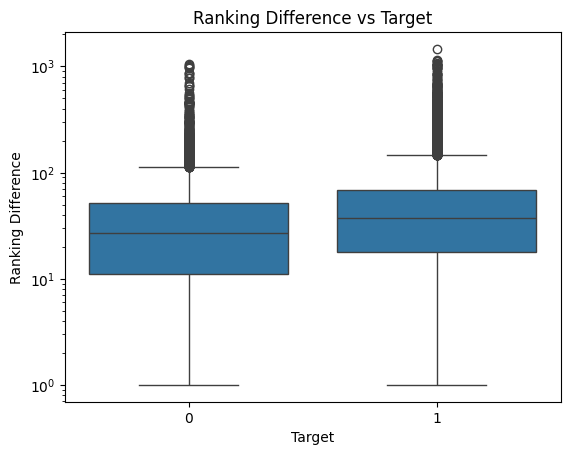

In [76]:
sns.boxplot(x='HR_win', y='ranking_difference', data=eda_df)
plt.xlabel('Target')
plt.ylabel('Ranking Difference')
plt.title('Ranking Difference vs Target')
plt.yscale('log')
plt.show()

Here we are seeing a difference in the mean and distribution ranking difference as it increases.  This graph is telling me that as ranking difference increases, the probability that the higher ranked player wins increases as well. Let's also look at surface win percent differences.

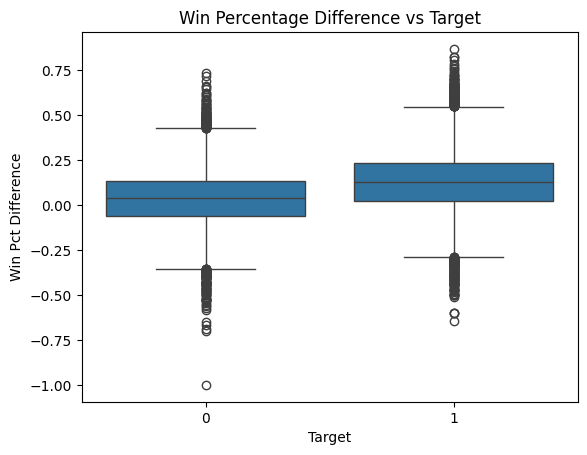

In [77]:
sns.boxplot(x='HR_win', y='win_pct_diff', data=eda_df)
plt.xlabel('Target')
plt.ylabel('Win Pct Difference')
plt.title('Win Percentage Difference vs Target')
plt.show()

I'm seeing a similar case for surface win percentage difference.  If the higher ranked player has a higher surface win percentage, then they are more likely to win. However, if they do not then the lower ranked player has a greater likelihood of winning.

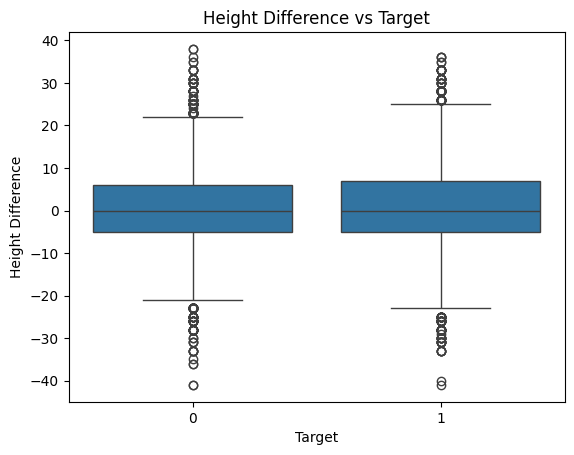

In [78]:
sns.boxplot(x='HR_win', y='height_diff', data=eda_df)
plt.xlabel('Target')
plt.ylabel('Height Difference')
plt.title('Height Difference vs Target')
plt.show()

For height difference I am seeing no tangible difference.  This means that it's unlikely that height is a factor in determining if the higher ranked player will win a tennis match.

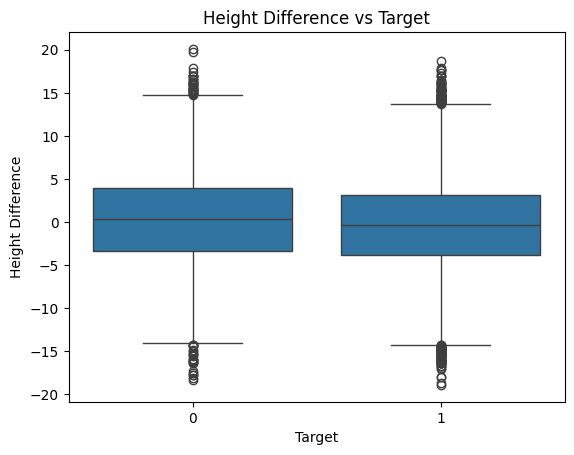

In [79]:
sns.boxplot(x='HR_win', y='age_diff', data=eda_df)
plt.xlabel('Target')
plt.ylabel('Height Difference')
plt.title('Height Difference vs Target')
plt.show()

For age there is a slight difference, but it's quite minimal. Again this does not seem to be a great predictor. Let's look at `num_matches` and then `best_of`.  Because `best_of` is just a boolean feature (best of 5 sets or best of 3 sets) I'm going to just look at the mean.

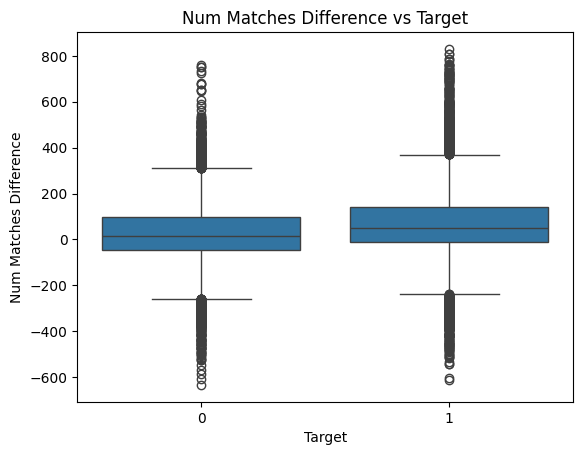

In [80]:
sns.boxplot(x='HR_win', y='num_matches_diff', data=eda_df)
plt.xlabel('Target')
plt.ylabel('Num Matches Difference')
plt.title('Num Matches Difference vs Target')
plt.show()

Again I'm seeing a slight difference here in means, but it is not substantial.  This feature will likely have some predictive strength, but not a lot. Lastly, let's look at `best_of`.

In [81]:
# best of 3 sets mean first
best_3_filtr = eda_df['best_of'] == 3

best_3_df = eda_df[best_3_filtr].copy()

best_3_df['HR_win'].sum() / best_3_df.shape[0]

0.641753748296229

In [82]:
# best of 5 sets mean now
best_5_filtr = eda_df['best_of'] == 5

best_5_df = eda_df[best_5_filtr].copy()

best_5_df['HR_win'].sum() / best_5_df.shape[0]

0.7123465972480476

`best_of` is actually a fair predictor of if the higher ranked player will win. If it's a best of 5 set match then the higher ranked player is more likely to win.

This is the end of my EDA for now.  I'm now going to turn to modeling.

### Modeling

For my modeling, I also want to take the difference between the higher ranked feature and the lower ranked feature. I'm going to run a logistic regression with all the features as is, and then look to run one with the differences.

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
y = final_df['HR_win']
X = final_df.drop(columns=['HR_win'])

X

,HR_rank,HR_ht,HR_age,HR_surface_win_pct,HR_surface_num_matches,LR_rank,LR_ht,LR_age,LR_surface_win_pct,LR_surface_num_matches,best_of,ranking_difference
106691,1.0,180.0,29.7,0.800546,366,112.0,180.0,21.3,0.315789,19,5.0,111.0
106692,47.0,193.0,23.3,0.490741,108,77.0,173.0,23.2,0.200000,25,5.0,30.0
106693,27.0,180.0,25.3,0.516129,62,33.0,183.0,21.8,0.333333,24,5.0,6.0
106694,93.0,183.0,29.7,0.528889,225,204.0,178.0,28.7,0.534413,247,5.0,111.0
106695,46.0,180.0,23.7,0.469388,49,65.0,180.0,31.1,0.484252,254,5.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3963,5.0,198.0,27.0,0.718232,181,13.0,193.0,26.5,0.571429,77,3.0,8.0
3962,32.0,188.0,26.9,0.583333,36,56.0,193.0,27.5,0.565217,23,3.0,24.0
3961,16.0,185.0,26.9,0.454545,44,24.0,198.0,28.5,0.600000,100,3.0,8.0
3960,5.0,198.0,27.0,0.719780,182,32.0,188.0,26.9,0.594595,37,3.0,27.0


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [86]:
# Fitting logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.6890545879472484
Test score: 0.6918711400433984


In [87]:
coefficients = logreg.coef_[0]
coefficients

array([-5.37636026e-03, -1.38794268e-03, -5.53726534e-02,  3.10103107e+00,
        1.40090567e-03, -1.40117708e-03, -5.56292344e-03,  7.65217804e-02,
       -1.86443583e+00, -2.00472514e-03,  1.52916694e-01,  3.97518318e-03])

In [88]:
feature_names = X_train.columns

coefficients = logreg.coef_[0]

for feat, coef in zip(feature_names, coefficients):
    print(f"feature: {feat}, coefficent: {coef}")

feature: HR_rank, coefficent: -0.005376360258356817
feature: HR_ht, coefficent: -0.0013879426774461312
feature: HR_age, coefficent: -0.055372653400389056
feature: HR_surface_win_pct, coefficent: 3.10103106893461
feature: HR_surface_num_matches, coefficent: 0.0014009056697606504
feature: LR_rank, coefficent: -0.001401177077024487
feature: LR_ht, coefficent: -0.005562923441357681
feature: LR_age, coefficent: 0.07652178041915204
feature: LR_surface_win_pct, coefficent: -1.8644358267686165
feature: LR_surface_num_matches, coefficent: -0.002004725144623406
feature: best_of, coefficent: 0.15291669397839297
feature: ranking_difference, coefficent: 0.003975183180955852


I'm getting the 2% bump that I've been looking for which is great. Let's look a little into feature importance and multicollinearity.

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_scaled = LogisticRegression(C=1)
logreg_scaled.fit(X_train_scaled, y_train)

coefficients = logreg_scaled.coef_[0]

In [91]:
print(f"Train score: {logreg_scaled.score(X_train_scaled, y_train)}")
print(f"Test score: {logreg_scaled.score(X_test_scaled, y_test)}")

Train score: 0.6884981358855935
Test score: 0.6913703889167084


In [92]:
feature_names = X_train.columns

coefficients = logreg_scaled.coef_[0]

for feat, coef in zip(feature_names, coefficients):
    print(f"feature: {feat}, coefficent: {coef}")

feature: HR_rank, coefficent: -0.19165979002916092
feature: HR_ht, coefficent: -0.006959751633072778
feature: HR_age, coefficent: -0.20641994050121007
feature: HR_surface_win_pct, coefficent: 0.464621572508098
feature: HR_surface_num_matches, coefficent: 0.18107228761384822
feature: LR_rank, coefficent: 0.06060199690439733
feature: LR_ht, coefficent: -0.03360818528950545
feature: LR_age, coefficent: 0.30444882377722804
feature: LR_surface_win_pct, coefficent: -0.2774895363280334
feature: LR_surface_num_matches, coefficent: -0.21345439091969365
feature: best_of, coefficent: 0.15249659955907685
feature: ranking_difference, coefficent: 0.1317505269245236


First, let's look into multicollinearity, and see if that is the case.

<Axes: >

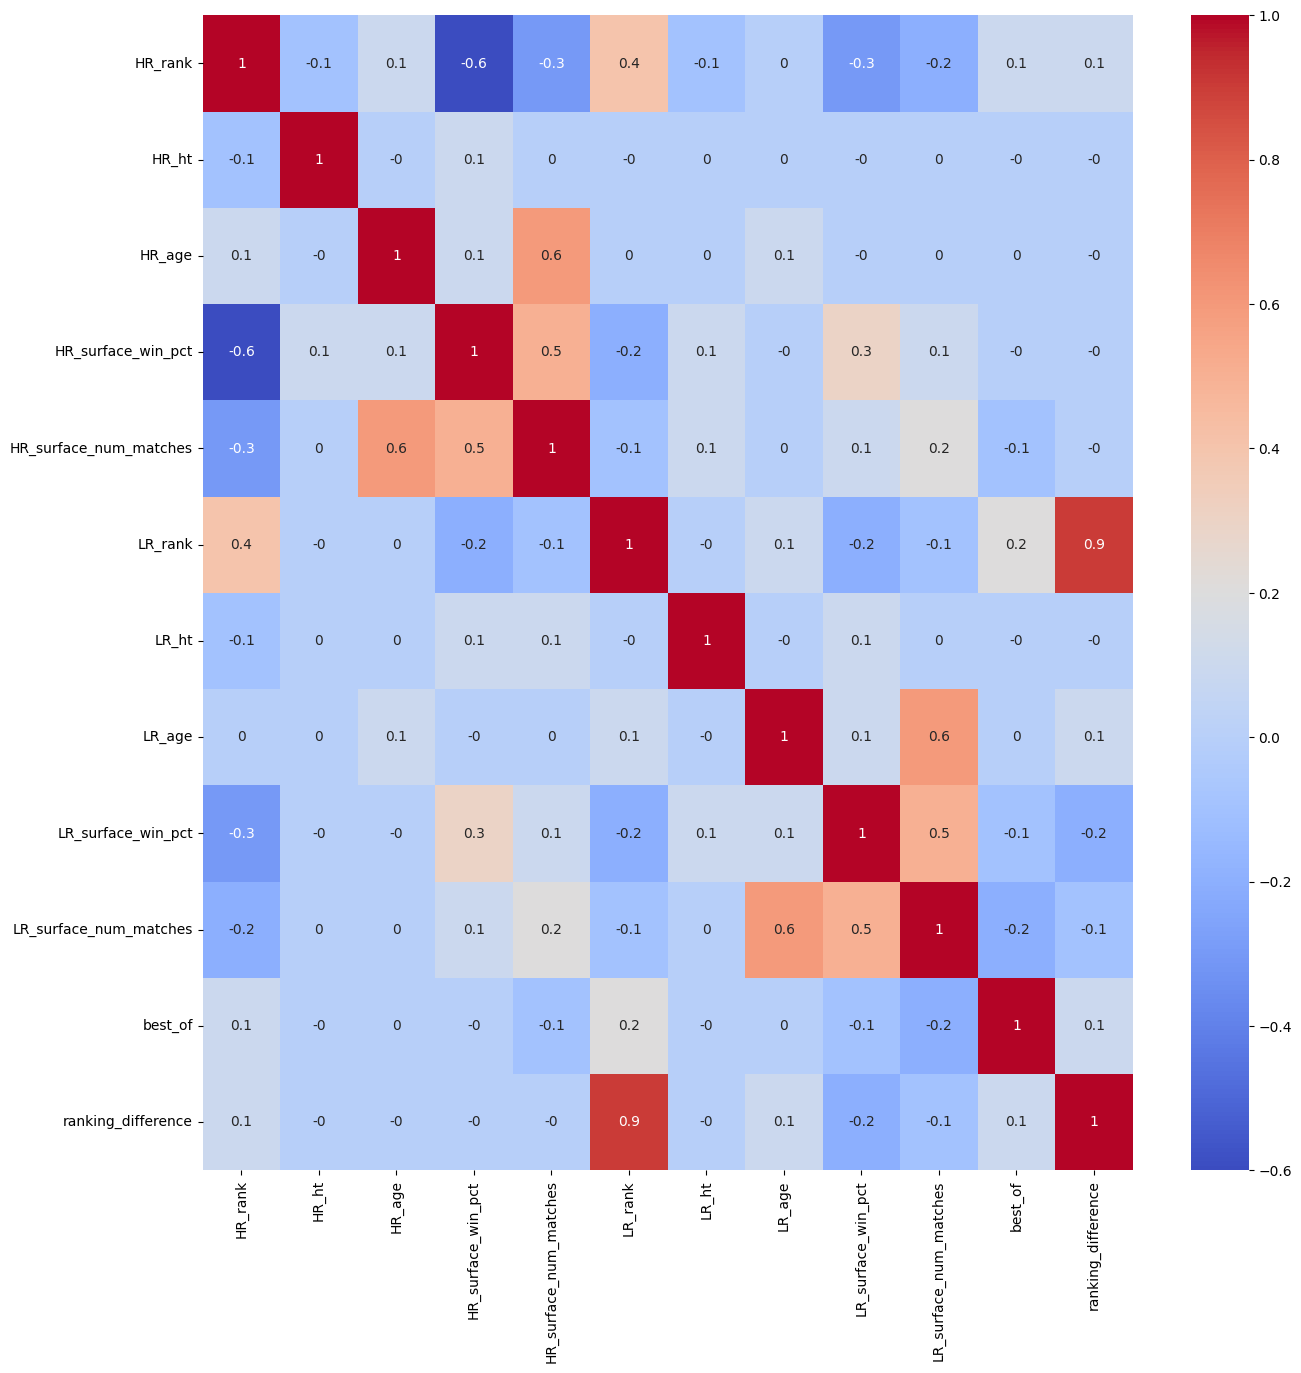

In [93]:
plt.figure(figsize=(15, 15))
sns.heatmap(X.corr().round(1), cmap="coolwarm", annot=True)

The correlation between some features is quite high. This is the be expected. Interestingly, the correlation between number of matches played, and age is quite high. This makes sense considering that as you get older, the number of matches you've played increases. Let's try the difference between some of these features, and then look at correlation.

In [94]:
final_df

,HR_rank,HR_ht,HR_age,HR_surface_win_pct,HR_surface_num_matches,LR_rank,LR_ht,LR_age,LR_surface_win_pct,LR_surface_num_matches,best_of,HR_win,ranking_difference
106691,1.0,180.0,29.7,0.800546,366,112.0,180.0,21.3,0.315789,19,5.0,1,111.0
106692,47.0,193.0,23.3,0.490741,108,77.0,173.0,23.2,0.200000,25,5.0,1,30.0
106693,27.0,180.0,25.3,0.516129,62,33.0,183.0,21.8,0.333333,24,5.0,0,6.0
106694,93.0,183.0,29.7,0.528889,225,204.0,178.0,28.7,0.534413,247,5.0,0,111.0
106695,46.0,180.0,23.7,0.469388,49,65.0,180.0,31.1,0.484252,254,5.0,1,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,5.0,198.0,27.0,0.718232,181,13.0,193.0,26.5,0.571429,77,3.0,1,8.0
3962,32.0,188.0,26.9,0.583333,36,56.0,193.0,27.5,0.565217,23,3.0,1,24.0
3961,16.0,185.0,26.9,0.454545,44,24.0,198.0,28.5,0.600000,100,3.0,0,8.0
3960,5.0,198.0,27.0,0.719780,182,32.0,188.0,26.9,0.594595,37,3.0,1,27.0


In [95]:
final_df['height_diff'] = final_df['HR_ht'] - final_df['LR_ht']
final_df['age_diff'] = final_df['HR_age'] - final_df['LR_age']
final_df['win_pct_diff'] = final_df['HR_surface_win_pct'] - final_df['LR_surface_win_pct']
final_df['num_matches_diff'] = final_df['HR_surface_num_matches'] - final_df['LR_surface_num_matches']

In [96]:
final_df.drop(columns=['HR_ht', 'LR_ht', 'HR_age', 'LR_age', 'HR_rank', 'LR_rank', 'HR_surface_win_pct', \
                      'LR_surface_win_pct', 'HR_surface_num_matches', 'LR_surface_num_matches'], inplace=True)

In [97]:
final_df.sample(10)

,best_of,HR_win,ranking_difference,height_diff,age_diff,win_pct_diff,num_matches_diff
106441,5.0,0,136.0,2.0,-3.6,0.025000,-7
14305,3.0,1,6.0,-7.0,-6.3,0.016667,5
18813,3.0,1,11.0,3.0,1.0,-0.151417,-128
105004,3.0,0,23.0,8.0,7.0,-0.127536,94
91042,3.0,0,14.0,10.0,-15.4,-0.058891,-415
83522,3.0,0,16.0,10.0,1.3,-0.146917,-43
61888,3.0,1,5.0,-10.0,0.5,0.157440,157
1112,3.0,0,37.0,7.0,-8.9,-0.104672,-228
80864,5.0,1,15.0,3.0,0.8,0.114725,63
78596,3.0,1,53.0,0.0,-3.0,-0.087012,-187


Now let's check correlations again.

In [98]:
y = final_df['HR_win']
X = final_df.drop(columns=['HR_win'])

X

,best_of,ranking_difference,height_diff,age_diff,win_pct_diff,num_matches_diff
106691,5.0,111.0,0.0,8.4,0.484757,347
106692,5.0,30.0,20.0,0.1,0.290741,83
106693,5.0,6.0,-3.0,3.5,0.182796,38
106694,5.0,111.0,5.0,1.0,-0.005524,-22
106695,5.0,19.0,0.0,-7.4,-0.014864,-205
...,...,...,...,...,...,...
3963,3.0,8.0,5.0,0.5,0.146803,104
3962,3.0,24.0,-5.0,-0.6,0.018116,13
3961,3.0,8.0,-13.0,-1.6,-0.145455,-56
3960,3.0,27.0,10.0,0.1,0.125186,145


<Axes: >

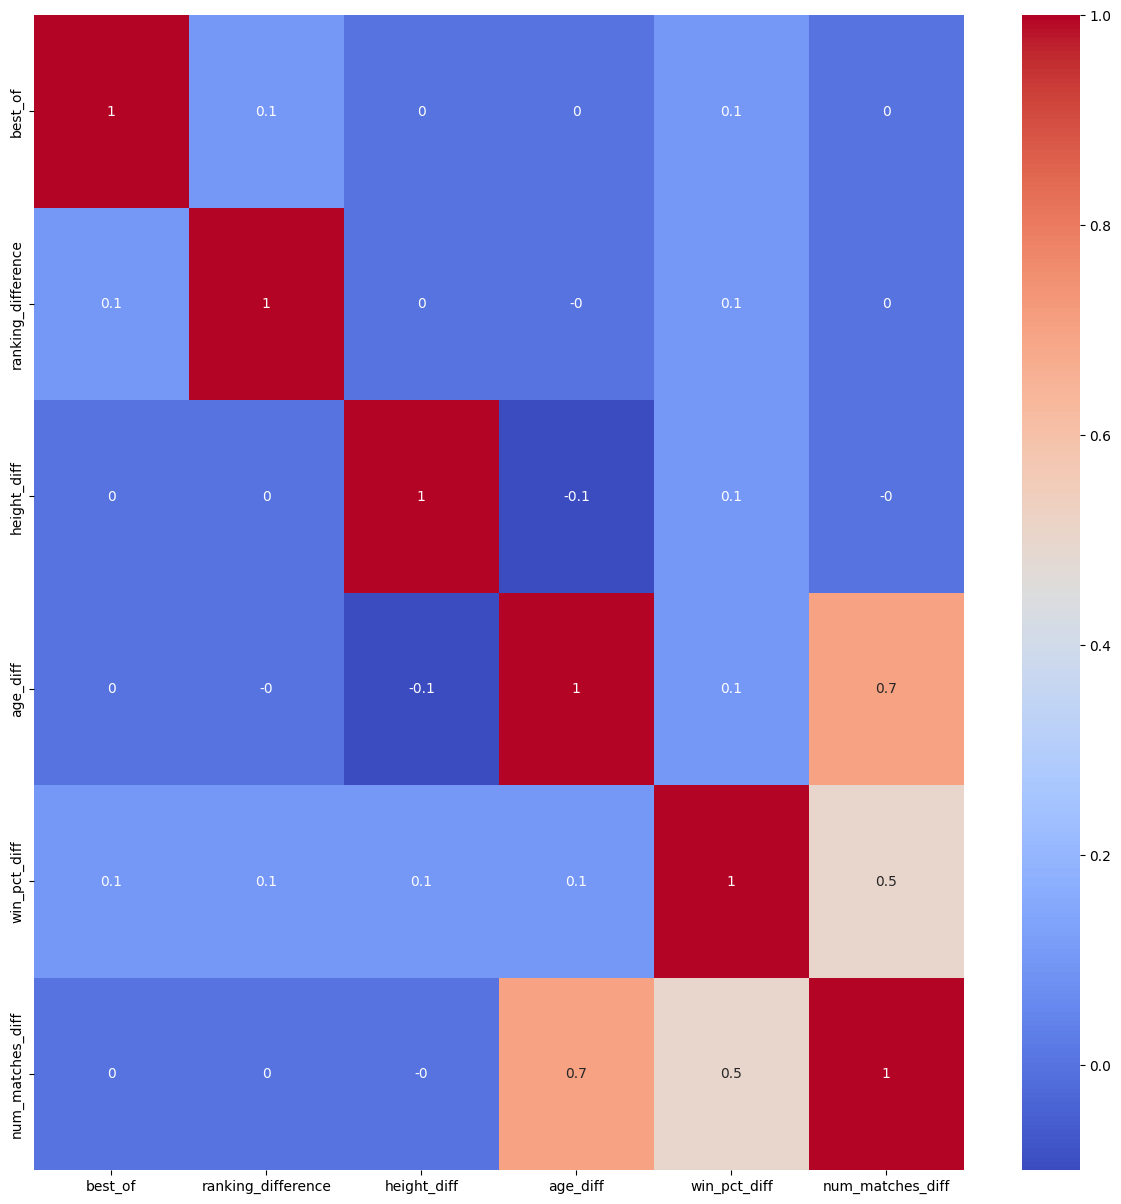

In [99]:
plt.figure(figsize=(15, 15))
sns.heatmap(X.corr().round(1), cmap="coolwarm", annot=True)

I'm still seeing some collinearity. Rather than get rid of some of my features, I'm going to use an L2 regularization to reduce effect of multicollinearity.

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Ridge logistic regression model (L2 regularization)
model_ridge = LogisticRegression(penalty='l2', C=10, solver='liblinear', max_iter=1000)  # C is the inverse of regularization strength
model_ridge.fit(X_train_scaled, y_train)


LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [101]:
print(f"Train score: {model_ridge.score(X_train_scaled, y_train)}")
print(f"Test score: {model_ridge.score(X_test_scaled, y_test)}")

Train score: 0.6871070057314562
Test score: 0.6888666332832583


In [102]:
# Get the feature importance (coefficients)
feature_importance_ridge = model_ridge.coef_[0]

# Create a DataFrame to display feature importance
import pandas as pd
feature_names = X.columns
importance_df_ridge = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_ridge
})

# Sort by absolute value of importance
importance_df_ridge['Abs_Importance'] = importance_df_ridge['Importance'].abs()
importance_df_ridge = importance_df_ridge.sort_values(by='Abs_Importance', ascending=False)

print(importance_df_ridge[['Feature', 'Importance']])

              Feature  Importance
4        win_pct_diff    0.503775
3            age_diff   -0.374165
5    num_matches_diff    0.270982
1  ranking_difference    0.148830
0             best_of    0.125223
2         height_diff    0.017163


In [103]:
# make all the feature differences, and throw out the HR and LR, and then try random forest - nonlinear model
# add a couple more features (ie win pct on surface)

In [104]:
# obj = {player_name: [.87, .78, .85] 

Modeling was not great, and definitely hoped for better, but it is a good start, and now I will just look to add better features.

Given that the outcome is the same if I were to just guess the higher ranked won each time, I need to employ some different strategies. For this I am going to make all the features differences of the higher ranked minus the lower ranked, and then try the non-linear random forest algorithm. 

In [105]:
final_df

,best_of,HR_win,ranking_difference,height_diff,age_diff,win_pct_diff,num_matches_diff
106691,5.0,1,111.0,0.0,8.4,0.484757,347
106692,5.0,1,30.0,20.0,0.1,0.290741,83
106693,5.0,0,6.0,-3.0,3.5,0.182796,38
106694,5.0,0,111.0,5.0,1.0,-0.005524,-22
106695,5.0,1,19.0,0.0,-7.4,-0.014864,-205
...,...,...,...,...,...,...,...
3963,3.0,1,8.0,5.0,0.5,0.146803,104
3962,3.0,1,24.0,-5.0,-0.6,0.018116,13
3961,3.0,0,8.0,-13.0,-1.6,-0.145455,-56
3960,3.0,1,27.0,10.0,0.1,0.125186,145


In [106]:
final_df['height_diff'] = final_df['HR_ht'] - final_df['LR_ht']
final_df['age_diff'] = final_df['HR_age'] - final_df['LR_age']
final_df['win_pct_diff'] = final_df['HR_surface_win_pct'] - final_df['LR_surface_win_pct']
final_df['num_matches_diff'] = final_df['HR_surface_num_matches'] - final_df['LR_surface_num_matches']

KeyError: 'HR_ht'

In [ ]:
final_df.drop(columns=['HR_ht', 'LR_ht', 'HR_age', 'LR_age', 'HR_rank', 'LR_rank', 'HR_surface_win_pct', \
                      'LR_surface_win_pct'], inplace=True)

In [ ]:
final_df

In [ ]:
final_df.drop(columns=['HR_surface_num_matches', 'LR_surface_num_matches'], inplace=True)

In [ ]:
final_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
y = final_df['HR_win']
X = final_df.drop(columns=['HR_win'])

X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# Without scaling
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_train,y_train) # for unlimited depth trees, training acc always 1.0

In [ ]:
rf.score(X_test,y_test)

In [ ]:
# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_scaled = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_scaled.fit(X_train_scaled, y_train)

In [ ]:
rf_scaled.score(X_train_scaled,y_train) # for unlimited depth trees, training acc always 1.0

In [ ]:
rf_scaled.score(X_test_scaled,y_test)

Even with the non-linear random forest classifier, I am still not able to add any significant increase in accuracy to my model. This means that I will likely need to add additional features to my data if I want to see any change. I will set about doing that.

In [ ]:
# Logistic with difference of features
# Fitting logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Can I look at feature importance for this model?

For my last model for this data I want to run a gradient boosting ML model. I'm going to go ahead and implement that now.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
y = final_df['HR_win']
X = final_df.drop(columns=['HR_win'])

X

In [ ]:
# train test split, and scale the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)

In [ ]:
print(f"Train score: {gbc.score(X_train_scaled, y_train)}")
print(f"Test score: {gbc.score(X_test_scaled, y_test)}")

In [ ]:
# Get the feature importance
feature_importance = gbc.feature_importances_

# Create a DataFrame to display feature importance
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

sns.barplot(data = importance_df, x = 'feature', y = 'importance')

plt.xticks(rotation = 90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title('Feature importances (gradient boosting classifier)', size = 16)